In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')


In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


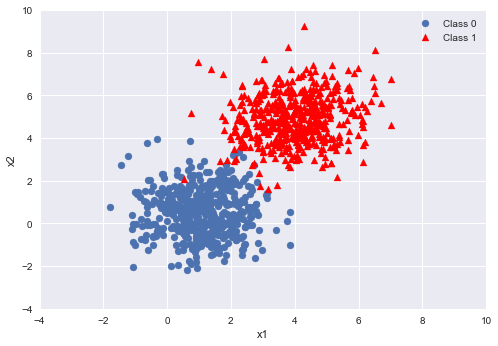

In [3]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [5]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [6]:
np.random.shuffle(data)
print(data[:10])

[[ 4.29763636  5.43087701  1.        ]
 [ 4.56574199  7.43533887  1.        ]
 [ 2.09953417  3.45984023  1.        ]
 [-0.33046768 -0.36670561  0.        ]
 [ 0.96838944  0.64493357  0.        ]
 [ 2.55647853  0.65907953  0.        ]
 [-0.43383047 -1.03408876  0.        ]
 [ 1.15725657  0.01836723  0.        ]
 [ 4.44313809  4.85339148  1.        ]
 [ 1.16519484 -0.08074302  0.        ]]


In [7]:
split = int(0.8*data.shape[0])

In [8]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [9]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [10]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [11]:
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [12]:
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [13]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [14]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [15]:
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [16]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [17]:
for i in range(1000):
    l,W,b = gradient_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

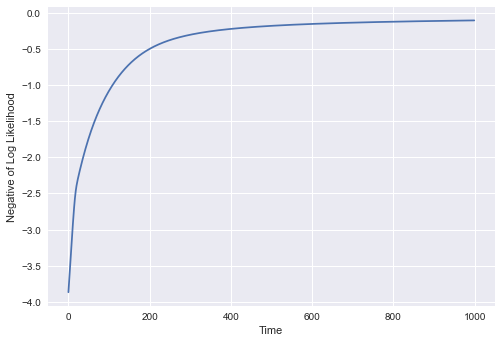

In [18]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

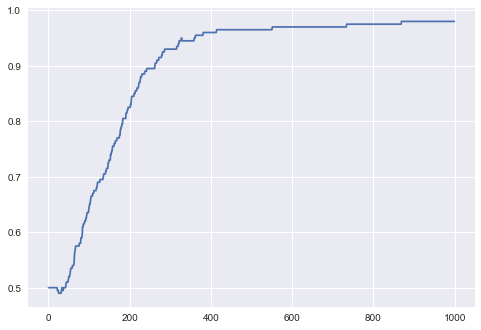

0.98


In [19]:
plt.plot(acc)
plt.show()
print(acc[-1])

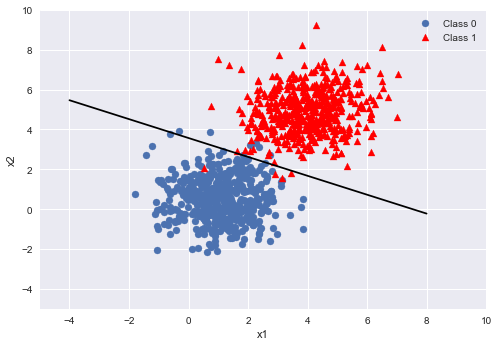

In [20]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [21]:
print(W)
print(b)

[0.60574752 1.27798855]
-4.560716409381649
